In [15]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil

output_folder = 'data/output/'
# output_folder = '/Users/nus/hg-core-decomposition/backup_output/mpi/data/output/'
# output_folder = 'run_1/mpi/data/output/'
# output_folder = 'run_2(mac)/data/output/'

# If fig folder exists remove it and its contents recursively
if os.path.exists(output_folder+"fig/"):
    shutil.rmtree(output_folder+"fig/")
os.mkdir(output_folder+"fig/")

fontsize = 22
labelsize = 18

In [40]:
# output_folder2 = '/Users/nus/hg-core-decomposition/backup_output/mpi/data/output/'
# output_folder2 = '/Users/nus/hg-core-decomposition/run_par/mpi/data/output/'
# df2 = pd.read_csv(output_folder2+"result.csv")
# df2.columns = ['algo', 'bucket update time', 'core', 'dataset', 'degree call time', 'execution time', 'init time', 'inner iteration', 'neighborhood call time', 'num bucket update', 'num degree computation', 'num neighborhood computation', 'num subgraph call', 'num_threads', 'outerloop time', 'param_s', 'subgraph computation time', 'total iteration']
# df2 = df2.loc[df2['algo'].isin(['naive_nbr','improved_nbr'])]
# df2.shape
# df2.head()

In [23]:
df = pd.read_csv("data/output/result.csv", header=None)
# df = pd.read_csv(output_folder+"result.csv")

# Includes local algorithm statistics
df.columns = ['algo', 'bucket update time', 'core', 'core_correction time', 'core_correction_volume', 'dataset', 'degree call time', 'execution time', 'h_index_time', 'init time', 'inner iteration', 'memory taken', 'neighborhood call time', 'num bucket update', 'num degree computation', 'num neighborhood computation', 'num subgraph call', 'num_threads', 'outerloop time', 'param_s', 'reduction_in_hhat', 'subgraph computation time', 'sum_core_correction_volume', 'tau', 'total iteration']

# Includes h-indextime
# df.columns = ['algo', 'bucket update time', 'core', 'core_correction time', 'dataset', 'degree call time', 'execution time', 'h_index_time', 'init time', 'inner iteration', 'memory taken', 'neighborhood call time', 'num bucket update', 'num degree computation', 'num neighborhood computation', 'num subgraph call', 'num_threads', 'outerloop time', 'param_s', 'subgraph computation time', 'total iteration']

#Includes core-correctiontime (no h-index/core-numbers )
# df.columns = ['algo', 'bucket update time', 'core_correction time', 'dataset', 'degree call time', 'execution time', 'init time', 'inner iteration', 'memory taken', 'neighborhood call time', 'num bucket update', 'num degree computation', 'num neighborhood computation', 'num subgraph call', 'num_threads', 'outerloop time', 'param_s', 'subgraph computation time', 'total iteration']

#includes core numbers as well (but no h-index)
# df.columns = ['algo', 'bucket update time', 'core', 'core_correction time', 'dataset', 'degree call time', 'execution time', 'init time', 'inner iteration', 'memory taken', 'neighborhood call time', 'num bucket update', 'num degree computation', 'num neighborhood computation', 'num subgraph call', 'num_threads', 'outerloop time', 'param_s', 'subgraph computation time', 'total iteration']

# df.columns = ['algo', 'bucket update time', 'core', 'dataset', 'degree call time', 'execution time', 'init time', 'inner iteration', 'neighborhood call time', 'num bucket update', 'num degree computation', 'num neighborhood computation', 'num subgraph call', 'num_threads', 'outerloop time', 'param_s', 'subgraph computation time', 'total iteration']
# df.columns = ['algo', 'bucket update time', 'core', 'dataset', 'degree call time', 'execution time', 'init time', 'inner iteration', 'memory taken', 'neighborhood call time', 'num bucket update', 'num degree computation', 'num neighborhood computation', 'num subgraph call', 'num_threads', 'outerloop time', 'param_s', 'subgraph computation time', 'total iteration']
print(df.shape)
# df.tail(10)

(56, 25)


In [46]:
# df = pd.concat([df,df2])
# df.shape

In [6]:
# # df = pd.read_csv("data/output/result.csv", header=None)
# df = pd.read_csv(output_folder+"result.csv")
# df.columns = ['algo', 'bucket update time', 'core', 'dataset', 'degree call time', 'execution time', 'neighborhood call time', 'num bucket update', 'num degree computation', 'num neighborhood computation', 'param_s']
# print(df.shape)
# # df

### sample plotting

In [24]:
save = True


sns.set(rc={'figure.figsize':(7,4)})
sns.set_style("whitegrid", {'axes.grid' : True})

# columns = ['bucket update time', 'execution time', 'init time', 'inner iteration', 'memory taken', 'neighborhood call time', 'num bucket update', 'num neighborhood computation', 'num subgraph call', 'outerloop time',  'subgraph computation time', 'total iteration']
# columns = ['execution time','Sum Core-correction vol', 'tau', 'h_index_time','core_correction time','memory taken','init time','outerloop time']
columns = ['execution time','sum_core_correction_volume', 'tau']
good_name = {
    'bucket update time' : 'Bucket time (s)', 
    'execution time' : "Time (s)", 
    'neighborhood call time' : "NB time (s)", 
    'subgraph computation time' : "Sub time(s)",
    'num bucket update' : "#bucket", 
    'num neighborhood computation' : "#nb",
    'num subgraph call' : "#subgraph",
    'outerloop time': "outloop time(s)",
    'init time': 'init time(s)',
    'total iteration': '#total iterations',
    'inner iteration': '#inner iterations',
    'memory taken': 'Memory(MB)',
    'core_correction time': 'Core-corection time(s)',
    'h_index_time': 'h-index time(s)',
    'sum_core_correction_volume' : 'Sum Core-correction vol',
    'tau': '#Iterations'
    # 'num_threads' : '#Threads'
}

# NBR(1) adopts Arijits simplification to Bishwa's simplification.
good_name_algo = {
    'naive_nbr' : "Peel", 
    'improved_nbr_simple': "E-Peel", 
    'recursive_local_core': "LOCAL(r)",
    'iterative_local_core': "LOCAL(i)",
    'bst_local_core': "LOCAL(b)",
    'improved_local_core': "LOCAL(im)",
    'opt_local_core': "LOCAL(o)",
    'par_local_core': "LOCAL(p)",
    'improved2_nbr' : "NBR(2)",
    'par_improved2_nbr' : "pNBR(2)",
    'par_improved3_nbr' : "pNBR(3)",
    'naive_degree' : "DEG"
}

# order=['Peel', 'E-Peel', 'LOCAL', 'LOCAL(i)','LOCAL(b)']
order=['LOCAL(i)',"LOCAL(o)","E-Peel", "Peel"]

# ['NBR', 'NBR(1)', 'NBR1s', 'NBR(2)',"pNBR(2)","pNBR(3)"]
group_list = ['dataset']
for key, item in df.groupby(group_list, as_index=False):
    # key contains dataset
    item['param_s'] = item['param_s'].astype(int)
    item = item.replace({"algo": good_name_algo})
    for y_axis in columns:

        sns.barplot(x='algo', y=y_axis, data=item, palette='colorblind', order=order )
        plt.xlabel('Algorithm', fontsize=fontsize)
        plt.ylabel(good_name[y_axis], fontsize=fontsize)
        # plt.yscale("log")
        plt.xticks(fontsize=labelsize)
        plt.yticks(fontsize=labelsize)
        plt.title(key)
        plt.tight_layout()
        filename = (key + " " + y_axis).replace(" ", "_")
        if(save):
            plt.savefig(output_folder+"fig/" + filename + ".pdf")
        else:
            print(filename)
            plt.show()
        plt.clf()

    # Commnet out following to see full results
    if(not save):
        break

<Figure size 504x288 with 0 Axes>

### Effect of parameter "s" in improved2_nbr

In [143]:
save = True

if(save):
    os.system("mkdir -p " + output_folder+"fig/param_s/" )

group_list = ['dataset']
for key, item in df[df['algo'] == 'improved2_nbr'].groupby(group_list, as_index=False):
    
    # key contains dataset
    item['param_s'] = item['param_s'].astype(int)

    for y_axis in ['bucket update time', 'execution time', 'neighborhood call time', 'num bucket update', 'num neighborhood computation','subgraph computation time','outerloop time', 'init time']:

        sns.barplot(x='param_s', y=y_axis, data=item, palette='colorblind')
        plt.xlabel(r'$s$', fontsize=fontsize)
        plt.ylabel(good_name[y_axis], fontsize=fontsize)
        # plt.yscale("log")
        # plt.xticks(rotation=45)
        plt.xticks(fontsize=labelsize)
        plt.yticks(fontsize=labelsize)

        plt.title(key)
        # plt.legend(loc='best', fontsize=labelsize-4)
        plt.tight_layout()
        filename = (key + " param_s " + y_axis).replace(" ", "_")
        if(save):
            plt.savefig(output_folder+"fig/param_s/" + filename + ".pdf")
        else:
            print(filename)
            plt.show()
        plt.clf()

    # Commnet out following to see full results
    if(not save):
        break


<Figure size 504x288 with 0 Axes>

### Effect of threads for parallel algorithms

In [4]:
save = True
sns.set(rc={'figure.figsize':(7,4)})
if(save):
    os.system("mkdir -p " + output_folder+"fig/num_threads/" )

# algorithms = ['par_improved2_nbr', 'par_improved3_nbr']
algorithms = ['par_local_core']
group_list = ['dataset','algo']
for key, item in df[df['algo'].isin(algorithms)].groupby(group_list, as_index=False):
    # key contains dataset
    item['num_threads'] = item['num_threads'].astype(int)
    
    for y_axis in ['bucket update time', 'execution time', 'neighborhood call time', 'num bucket update', 'num neighborhood computation','subgraph computation time','outerloop time', 'init time']:
        sns.barplot(x='num_threads', y=y_axis, data=item, palette='colorblind')
        plt.xlabel('#Threads', fontsize=fontsize)
        plt.ylabel(y_axis, fontsize=fontsize)
        # plt.yscale("log")
        # plt.xticks(rotation=45)
        plt.xticks(fontsize=labelsize)
        plt.yticks(fontsize=labelsize)
        # print(key)
        plt.title(key[0] + "_" + good_name_algo[key[1]])
        plt.title(key)
        # plt.legend(loc='best', fontsize=labelsize-4)
        plt.tight_layout()
        filename = (key[0] + "_" + good_name_algo[key[1]] + " num threads " + y_axis).replace(" ", "_")
        # filename = key+"_"+y_axis
        if(save):
            plt.savefig(output_folder+"fig/num_threads/" + filename + ".pdf")
        else:
            print(filename)
            plt.show()
        plt.clf()

    # Commnet out following to see full results
    if(not save):
        break


<Figure size 504x288 with 0 Axes>

### Effect of threads for parallel algorithms (multiple barplots)
--------------

In [150]:
save = True
sns.set(rc={'figure.figsize':(7,4)})
if(save):
    os.system("mkdir -p " + output_folder+"fig/num_threads/" )


group_list = ['dataset']
for key, item in df[df['algo'].isin(['par_improved2_nbr', 'par_improved3_nbr'])].groupby(group_list, as_index=False):
    # key contains dataset
    item['num_threads'] = item['num_threads'].astype(int)
    
    for y_axis in ['bucket update time', 'execution time', 'neighborhood call time', 'num bucket update', 'num neighborhood computation','subgraph computation time','outerloop time', 'init time']:
        dat = item[['num_threads',y_axis,'algo']]
        dat = dat.melt(id_vars=['num_threads','algo'])
        # print(dat.head(10))
        # break
        sns.barplot(x='num_threads', y='value', hue='algo', data= dat, palette='colorblind')
        # sns.barplot(x='num_threads', y=y_axis, data=item, palette='colorblind')
        plt.xlabel('#Threads', fontsize=fontsize)
        plt.ylabel(y_axis, fontsize=fontsize)
        # plt.yscale("log")
        # plt.xticks(rotation=45)
        plt.xticks(fontsize=labelsize)
        plt.yticks(fontsize=labelsize)
        # print(key)
        # plt.title(key[0] + "_" + good_name_algo[key[1]])
        plt.title(key)
        # plt.legend(loc='best', fontsize=labelsize-4)
        plt.tight_layout()
        # filename = (key[0] + "_" + good_name_algo[key[1]] + " num threads " + y_axis).replace(" ", "_")
        filename = key+"_"+y_axis
        if(save):
            plt.savefig(output_folder+"fig/num_threads/" + filename + ".pdf")
        else:
            print(filename)
            plt.show()
        plt.clf()

    # Commnet out following to see full results
    if(not save):
        break

<Figure size 504x288 with 0 Axes>

In [28]:
df.columns

Index(['algo', 'bucket update time', 'core', 'dataset', 'degree call time',
       'execution time', 'neighborhood call time', 'num bucket update',
       'num degree computation', 'num neighborhood computation', 'param_s'],
      dtype='object')

### statistics of run

In [30]:
group_list = ['dataset', 'algo', 'param_s']
for key, item in df.groupby(group_list, as_index=False):
    print(key, item.shape[0])

('default', 'improved2_nbr', 16.0) 100
('default', 'improved_nbr', 13.0) 100
('default', 'naive_degree', 13.0) 100
('default', 'naive_nbr', 1.0) 100


In [31]:
# df[(df['algo'] == "improved2_nbr") & (df['dataset'] == 'bin_4') & (df['param_s'] == 6)]

%Time spent on subgraph computation
-----------

In [24]:
save = True


sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("whitegrid", {'axes.grid' : True})



good_name = {
    'bucket update time' : 'Bucket time (s)', 
    'execution time' : "Time (s)", 
    'neighborhood call time' : "NB time (s)", 
    'subgraph computation time' : "Sub time(s)",
    'num bucket update' : "#bucket", 
    'num neighborhood computation' : "#nb",
    'num subgraph call' : "#subgraph",
    'ratio(subg.time,total)': "subgtime/total"
}

good_name_algo = {
    'naive_nbr' : "NBR", 
    'improved_nbr' : "NBR(1)", 
    'improved2_nbr' : "NBR(2)",
    'naive_degree' : "DEG"
}



df['ratio(subg.time,total)'] = df['subgraph computation time']/df['execution time']
group_list = ['dataset']
for key, item in df.groupby(group_list, as_index=False):
    # key contains dataset
    item['param_s'] = item['param_s'].astype(int)
    item = item.replace({"algo": good_name_algo})
    # item['ratio(subg.time,total)'] = item['subgraph computation time']/item['execution time']
    # print(item[['execution time',  'subgraph computation time','ratio(subg.time,total)']].head())
    for y_axis in ['ratio(subg.time,total)']:

        sns.barplot(x='algo', y=y_axis, data=item, palette='colorblind', order=['NBR', 'NBR(1)', 'NBR(2)'])
        plt.xlabel('Algorithm', fontsize=fontsize)
        plt.ylabel(good_name[y_axis], fontsize=fontsize)
        # plt.yscale("log")
        plt.xticks(fontsize=labelsize)
        plt.yticks(fontsize=labelsize)
        plt.title(key)
        plt.tight_layout()
        filename = (key + " " + y_axis).replace(" ", "_")
        if(save):
            plt.savefig(output_folder+"fig/" + filename + ".pdf")
        else:
            print(filename)
            plt.show()
        plt.clf()

    # Commnet out following to see full results
    if(not save):
        break

KeyError: 'subgraph computation time'

Distribution of core-numbers.
-----------

In [90]:
import ast

# save = True


sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("whitegrid", {'axes.grid' : True})



good_name = {
    'bucket update time' : 'Bucket time (s)', 
    'execution time' : "Time (s)", 
    'neighborhood call time' : "NB time (s)", 
    'subgraph computation time' : "Sub time(s)",
    'num bucket update' : "#bucket", 
    'num neighborhood computation' : "#nb",
    'num subgraph call' : "#subgraph"
}

good_name_algo = {
    'naive_nbr' : "NBR", 
    'improved_nbr' : "NBR(1)", 
    'improved2_nbr' : "NBR(2)",
    'naive_degree' : "DEG"
}

group_list = ['dataset']

for key, item in df.groupby(group_list, as_index=False):
    # key contains dataset
    # item['param_s'] = item['param_s'].astype(int)
    item = item.replace({"algo": good_name_algo})
    
    nbr_distr = {}
    core = ast.literal_eval(item[item['algo'] == 'NBR'].iloc[0].core)
    N = len(core)
    for node_id, core_num in core.items():
        nbr_distr[core_num] = nbr_distr.get(core_num,0) + 1/N 
    
    x = range(1,max(nbr_distr.keys())+1)
    y = [ nbr_distr.get(i,0) for i in x]
    plt.figure(figsize=(6,4))
    plt.plot(x,y, marker = 'o')
    plt.xlabel('nbr-core number')
    plt.ylabel('fraction of vertices')
    plt.title(key)
    plt.savefig(output_folder+"fig/"+'nbrcore_'+key+'.pdf',bbox_inches = 'tight')
    plt.close() 

    deg_distr = {}
    core = ast.literal_eval(item[item['algo'] == 'DEG'].iloc[0].core)
    N = len(core)
    for node_id, core_num in core.items():
        deg_distr[core_num] = deg_distr.get(core_num,0)+ 1/N 
    x = range(1,max(deg_distr.keys())+1)
    y = [ deg_distr.get(i,0) for i in x]
    plt.figure(figsize=(6,4))
    plt.plot(x,y,marker = 'o')
    plt.xlabel('deg-core number')
    plt.ylabel('fraction of vertices')
    plt.title(key)
    plt.savefig(output_folder+"fig/"+'degcore_'+key+'.pdf',bbox_inches = 'tight')
    plt.close()
    # for y_axis in ['bucket update time', 'execution time', 'neighborhood call time', 'num bucket update', 'num neighborhood computation', 'subgraph computation time', 'num subgraph call']:

    #     sns.barplot(x='algo', y=y_axis, data=item, palette='colorblind', order=['NBR', 'NBR(1)', 'NBR(2)'])
    #     plt.xlabel('Algorithm', fontsize=fontsize)
    #     plt.ylabel(good_name[y_axis], fontsize=fontsize)
    #     # plt.yscale("log")
    #     plt.xticks(fontsize=labelsize)
    #     plt.yticks(fontsize=labelsize)
    #     plt.title(key)
    #     plt.tight_layout()
    #     filename = (key + " " + y_axis).replace(" ", "_")
    #     if(save):
    #         plt.savefig(output_folder+"fig/" + filename + ".pdf")
    #     else:
    #         print(filename)
    #         plt.show()
    #     plt.clf()

    # Commnet out following to see full results
    # if(not save):
    #     break

str

In [4]:
df.iloc[1].core

IndexError: single positional indexer is out-of-bounds

dummy cell

Pandemic propagation results

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
from ast import literal_eval
import shutil

output_folder = 'data/output/'
# if os.path.exists(output_folder+"fig/"):
#     shutil.rmtree(output_folder+"fig/")
# os.mkdir(output_folder+"fig/")

fontsize = 18
labelsize = 12

In [2]:
df = pd.read_csv(output_folder + "propagation_result.csv", header=None)
df.columns = ['algo', 'dataset', 'exp2', 'p', 'result', 'timestep_results']
print(df.shape)
df.head(15)


(42, 6)


,algo,dataset,exp2,p,result,timestep_results
0,naive_degree,bin_1,0.0,0.3,"{12: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",NaN
1,naive_nbr,bin_1,0.0,0.3,"{31: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",NaN
2,naive_degree,bin_4,0.0,0.3,"{13: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",NaN
3,naive_nbr,bin_4,0.0,0.3,"{23: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",NaN
4,naive_degree,bin_4,1.0,0.3,NaN,"{12: [3, 3, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 3, 3..."
5,naive_nbr,bin_4,1.0,0.3,NaN,"{22: [3, 0, 2, 2, 2, 2, 3, 2, 2, 1, 3, 2, 3, 3..."
6,naive_degree,bin_1,1.0,0.3,NaN,"{11: [2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3..."
7,naive_nbr,bin_1,1.0,0.3,NaN,"{29: [2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2..."
8,naive_nbr,bin_2,0.0,0.3,"{186: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",NaN
9,naive_nbr,bin_5,0.0,0.3,"{136: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",NaN


In [3]:
# save = False

# group_list = ['algo', 'dataset', 'p']
# ignore_datasets = ['bin_1','bin_2','bin_4','bin_5', 'congress', 'contact']
# # group_list = ['algo',  'p']
# for key, item in df[df['exp2'] == False].groupby(group_list, as_index=False):
#     # there should be only one result
#     assert item.shape[0] == 1
#     if item['dataset'].values[0] in ignore_datasets:
#         continue
#     result = literal_eval(item['result'].iloc[0])
#     result = [(k, v) for k in result for v in result[k]]
#     result_df = pd.DataFrame(result, columns = ['core number', 'infected'])
    
#     sns.barplot(x = 'core number', y = 'infected', data=result_df, palette='colorblind')
#     # sns.ecdfplot(x = 'core number', y = 'infected', data=result_df, palette='colorblind')
#     # sns.ecdfplot(data=result_df[['core number','infected']],x = 'core number', palette='colorblind')
#     plt.xlabel('Core Number', fontsize=fontsize)
#     plt.ylabel("Fraction of Infected", fontsize=fontsize)
#     plt.xticks(fontsize=labelsize,rotation=45)
#     # plt.xticks()
#     plt.yticks(fontsize=labelsize)
#     plt.title(key)
#     plt.tight_layout()
#     filename = (" ".join(map(str, key)) + " propagation").replace(" ", "_").replace(".", "")
#     if(save):
#         plt.savefig(output_folder+"fig/" + filename + ".pdf")
#     else:
#         print(filename)
#         plt.show()
#         break
#     plt.clf()

#     #Plot mean
#     meandf = result_df.groupby('core number').mean().reset_index()
#     sns.lineplot(x = 'core number', y = 'infected', data=meandf, color='k')
#     plt.xlabel('Core number', fontsize=fontsize)
#     plt.ylabel("Fraction of infected", fontsize=fontsize)
#     plt.xticks(fontsize=labelsize,rotation=45)
#     # plt.xticks()
#     plt.yticks(fontsize=labelsize)
#     # plt.title(key)
#     plt.tight_layout()
#     filename = (" ".join(map(str, key)) + " propagation").replace(" ", "_").replace(".", "")
#     if(save):
#         plt.savefig(output_folder+"fig/" + filename + "_mean.pdf")
#     else:
#         print(filename)
#         plt.show()
#         break
#     plt.clf()

In [4]:
save = True



ignore_datasets = ['bin_1','bin_2','bin_4','bin_5', 'congress', 'contact']
group_list = ['dataset', 'p']
goodname_algo = {
        'graph_core': 'clique graph',
        'naive_nbr': 'nbr-based hyp.',
        'naive_degree': 'deg-based hyp.'
    }

# group_list = ['algo',  'p']
for key, item in df[df['exp2'] == False].groupby(group_list, as_index=False):
    if item['dataset'].values[0] in ignore_datasets:
        continue


    item['algo'] = item['algo'].replace(goodname_algo)
    result_df = pd.DataFrame()
    for algo in item['algo'].unique():
        
        assert item[item['algo'] == algo].shape[0] == 1
        result = literal_eval(item[item['algo'] == algo]['result'].iloc[0])
        result = [(k, v, algo) for k in result for v in result[k]]
        result_df = result_df.append(pd.DataFrame(result, columns = ['core number', 'infected', 'algo']), ignore_index=False)
        
    # print(result_df)
    
    # sns.barplot(x = 'core number', y = 'infected', hue='algo', data=result_df, palette='colorblind')
    # # sns.ecdfplot(x = 'core number', y = 'infected', data=result_df, palette='colorblind')
    # # sns.ecdfplot(data=result_df[['core number','infected']],x = 'core number', palette='colorblind')
    # plt.xlabel('Core Number', fontsize=fontsize)
    # plt.ylabel("Fraction of Infected", fontsize=fontsize)
    # plt.xticks(fontsize=labelsize,rotation=45)
    # # plt.xticks()
    # plt.yticks(fontsize=labelsize)
    # plt.title(key)
    # plt.tight_layout()
    # filename = (" ".join(map(str, key)) + " propagation").replace(" ", "_").replace(".", "")
    # if(save):
    #     plt.savefig(output_folder+"fig/" + filename + "_all_algo.pdf")
    # else:
    #     print(filename)
    #     plt.show()
    #     break
    # plt.clf()

    #Plot mean
    meandf = result_df.groupby(['core number', 'algo']).mean().reset_index()
    fig, ax = plt.subplots()
    sns.lineplot(x = 'core number', y = 'infected', hue='algo', hue_order = ['clique graph', 'nbr-based hyp.', 'deg-based hyp.'], data=meandf, color='k')
    
    plt.xlabel('Core number', fontsize=fontsize)
    plt.ylabel("Fraction of infected", fontsize=fontsize)
    plt.xticks(fontsize=labelsize)
    # plt.xticks()
    plt.yticks(fontsize=labelsize)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles[1:], labels=labels[1:], fontsize=labelsize)
    # plt.title(key)
    plt.tight_layout()
    filename = (" ".join(map(str, key)) + " propagation").replace(" ", "_").replace(".", "")
    if(save):
        plt.savefig(output_folder+"fig/" + filename + "_mean_all_algo.pdf")
    else:
        print(filename)
        plt.show()
        break
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [7]:
df[df['exp2'] == True]['algo'].unique()

array(['naive_degree', 'naive_nbr', 'graph_core'], dtype=object)

In [28]:
from matplotlib.ticker import MaxNLocator
save = True


group_list = ['algo', 'dataset', 'p']
# group_list = ['algo',  'p']
for key, item in df[df['exp2'] == True].groupby(group_list, as_index=False):
    # there should be only one result
    assert item.shape[0] == 1
    if item['dataset'].values[0] in ignore_datasets:
        continue
    

    
    result = literal_eval(item['timestep_results'].iloc[0])
    result = [(k, v) for k in result for v in result[k]]
    result_df = pd.DataFrame(result, columns = ['core number', 'timestep of infection'])
    
    
    sns.lineplot(x = 'core number', y = 'timestep of infection',  data=result_df, color = 'k')
    # sns.ecdfplot(x = 'core number', y = 'infected', data=result_df, palette='colorblind')
    # sns.ecdfplot(data=result_df[['core number','infected']],x = 'core number', palette='colorblind')

    plt.xlabel('Core number', fontsize=fontsize)
    plt.ylabel("First infection-time", fontsize=fontsize)
    plt.xticks(fontsize=labelsize)
    # plt.xticks()
    plt.yticks(fontsize=labelsize)
    plt.title(goodname_algo[key[0]], fontsize=labelsize)
    plt.tight_layout()
    # TODO: 
    #  Add redline on the MAX_ITERATION
    filename = (" ".join(map(str, key)) + " propagation").replace(" ", "_").replace(".", "")
    if(save):
        plt.savefig(output_folder+"fig/" + filename + "_exp2.pdf")
    else:
        print(filename)
        plt.show()
        break
    plt.clf()

    # # Plot mean
    # meandf = result_df.groupby('core number').mean()
    # print(meandf.head())
    # break
    # sns.barplot(x = 'core number', y = 'timestep of infection', data=meandf, palette='colorblind')
    # # sns.ecdfplot(x = 'core number', y = 'infected', data=result_df, palette='colorblind')
    # # sns.ecdfplot(data=result_df[['core number','infected']],x = 'core number', palette='colorblind')
    # plt.xlabel('Core number', fontsize=fontsize)
    # plt.ylabel("First infection-time", fontsize=fontsize)
    # plt.xticks(fontsize=labelsize,rotation=45)
    # # plt.xticks()
    # plt.yticks(fontsize=labelsize)
    # plt.title(key)
    # plt.tight_layout()
    # # TODO: 
    # #  Add redline on the MAX_ITERATION
    # filename = (" ".join(map(str, key)) + " propagation").replace(" ", "_").replace(".", "")
    # if(save):
    #     plt.savefig(output_folder+"fig/" + filename + "_exp2(mean).pdf")
    # else:
    #     print(filename)
    #     plt.show()
    #     break
    # plt.clf()

<Figure size 432x288 with 0 Axes>

Qualitative Plots
===========

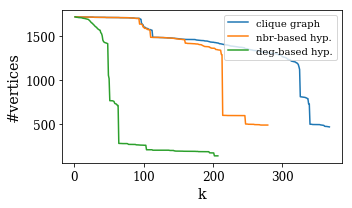

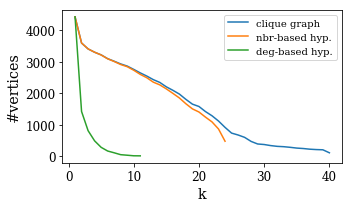

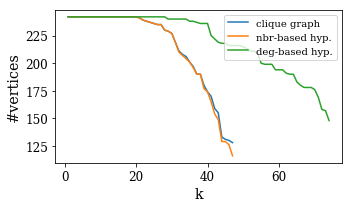

In [20]:
import pickle
import matplotlib.pyplot as plt 
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')

# plt.style.use('plot.mplstyle')
save = True
_min = 1
_max = 100
def get_core_decomposition(core_numbers):
    _max = max(core_numbers.values())
    freq = { k : 0 for k in range(_min,_max+1)} 
    for node, val in core_numbers.items():
        for i in range(1, val+1):
            freq[i] = freq.get(i, 0)+1
    return freq

# for dataset in ['enron']:
for dataset in ['congress','enron','contact']:
    algo_list = ['graph_core','naive_nbr','naive_degree']
    goodname = {
        'graph_core': 'clique graph',
        'naive_nbr': 'nbr-based hyp.',
        'naive_degree': 'deg-based hyp.'
    }

    fig = plt.figure(figsize=(5, 3))
    ax = fig.add_subplot(1, 1, 1)
    for algo in algo_list:
        fname = "tests/tmp/" + dataset + "_" + algo + ".pkl"
        with open(fname, 'rb') as handle:
            hgDecompose = pickle.load(handle)
            core_base = hgDecompose.core
            core_decomp = get_core_decomposition(core_base)
            x = list(core_decomp.keys())
            y = [core_decomp[i] for i in x]
            plt.plot(x,y, label = goodname[algo])
    plt.xlabel('k', fontsize='x-large')
    plt.ylabel('#vertices', fontsize='x-large')
    plt.legend(loc = 'upper right')
    plt.tight_layout()
    plt.savefig('data/output/qualitative/'+ dataset+'.pdf')

## Local core algorithm analysis

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
from ast import literal_eval
import shutil

output_folder = 'data/output/'

fontsize = 18
labelsize = 12

In [2]:
dataset = "enron"
df = pd.read_csv(output_folder + dataset + "_local_core.csv", header=None)
df.columns = ['algo', 'core', 'dataset', 'execution time', 'iteration', 'num_threads', 'outer iteration']
print(df.shape)
df.head(15)

(6, 7)


,algo,core,dataset,execution time,iteration,num_threads,outer iteration
0,opt_local_core,"{'1': 162, '100': 33, '1000': 68, '10007': 16,...",enron,0.001224,0.0,4.0,0.0
1,opt_local_core,"{'1': 43, '100': 15, '1000': 35, '10007': 10, ...",enron,0.450045,1.0,4.0,0.0
2,opt_local_core,"{'1': 28, '100': 15, '1000': 26, '10007': 10, ...",enron,0.623858,2.0,4.0,0.0
3,opt_local_core,"{'1': 25, '100': 15, '1000': 25, '10007': 10, ...",enron,0.759923,3.0,4.0,0.0
4,opt_local_core,"{'1': 24, '100': 15, '1000': 24, '10007': 10, ...",enron,0.891777,4.0,4.0,0.0
5,opt_local_core,"{'1': 24, '100': 15, '1000': 24, '10007': 10, ...",enron,1.015361,5.0,4.0,0.0


In [3]:
df['core'] = df.apply(lambda x: literal_eval(x['core']), axis = 1)

In [4]:
best_index = df['iteration'].argmax() # last iteration is the best (actual) value of core
best_core = df.iloc[best_index]['core']
best_index

5

In [5]:
def element_wise_matching(current_core, best_core):
    correct_matching = 0
    for k in current_core:
        if(current_core[k] == best_core[k]):
            correct_matching += 1
    return float(correct_matching / len(best_core))

def accumulated_per_vertex_accuracy(current_core, best_core):
    per_vertex_error = 0
    for k in current_core:
        per_vertex_error += float((abs(current_core[k] - best_core[k])) / max(current_core[k], best_core[k]))
    
    return 1 - float(per_vertex_error / len(best_core)) 

def accumulated_accuracy(current_core, best_core):

    total_error = 0
    core_total = 0
    for k in current_core:
        total_error += abs(current_core[k] - best_core[k])
        core_total += max(current_core[k], best_core[k])
    
    return 1 - float(total_error / core_total) 

# for i in range(best_index):
#     print(i)
#     print(element_wise_matching(df.iloc[i]['core'], best_core))
#     print(accumulated_per_vertex_accuracy(df.iloc[i]['core'], best_core))
#     print(accumulated_accuracy(df.iloc[i]['core'], best_core))
    


In [6]:
df['element_wise_matching'] = df.apply(lambda x: element_wise_matching(x['core'], best_core), axis=1)
df['accumulated_per_vertex_accuracy'] = df.apply(lambda x: accumulated_per_vertex_accuracy(x['core'], best_core), axis=1)
df['accumulated_accuracy'] = df.apply(lambda x: accumulated_accuracy(x['core'], best_core), axis=1)
df

,algo,core,dataset,execution time,iteration,num_threads,outer iteration,element_wise_matching,accumulated_per_vertex_accuracy,accumulated_accuracy
0,opt_local_core,"{'1': 162, '100': 33, '1000': 68, '10007': 16,...",enron,0.001224,0.0,4.0,0.0,0.594393,0.826319,0.504058
1,opt_local_core,"{'1': 43, '100': 15, '1000': 35, '10007': 10, ...",enron,0.450045,1.0,4.0,0.0,0.907529,0.985206,0.965787
2,opt_local_core,"{'1': 28, '100': 15, '1000': 26, '10007': 10, ...",enron,0.623858,2.0,4.0,0.0,0.963147,0.997175,0.994300
3,opt_local_core,"{'1': 25, '100': 15, '1000': 25, '10007': 10, ...",enron,0.759923,3.0,4.0,0.0,0.984852,0.999335,0.998692
4,opt_local_core,"{'1': 24, '100': 15, '1000': 24, '10007': 10, ...",enron,0.891777,4.0,4.0,0.0,0.999322,0.999973,0.999947
5,opt_local_core,"{'1': 24, '100': 15, '1000': 24, '10007': 10, ...",enron,1.015361,5.0,4.0,0.0,1.000000,1.000000,1.000000


enron_element_wise_matching_vs_time


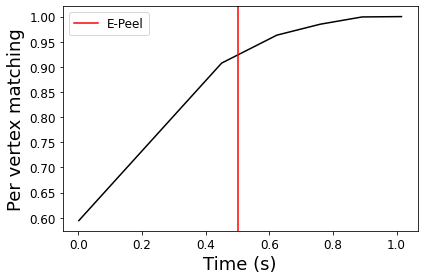

enron_accumulated_per_vertex_accuracy_vs_time


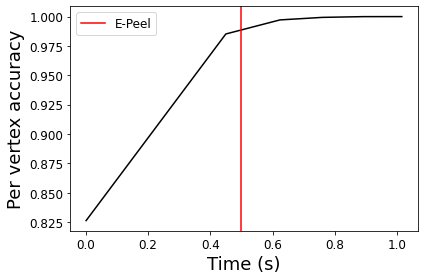

enron_accumulated_accuracy_vs_time


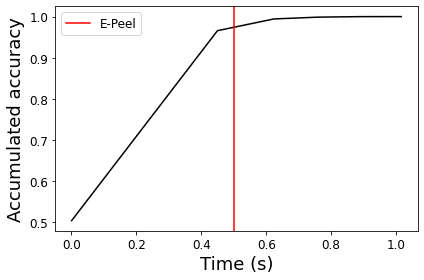

<Figure size 432x288 with 0 Axes>

In [10]:
save = False


e_peel_time = {
    'enron' : 0.5, 
    "dblp" : 2305
}

goodname_accuracy = {
    'element_wise_matching' : 'Per vertex matching', 
    'accumulated_per_vertex_accuracy' : 'Per vertex accuracy',
    'accumulated_accuracy' : 'Accumulated accuracy'
}

for y in ['element_wise_matching', 'accumulated_per_vertex_accuracy', 'accumulated_accuracy']:
    g = sns.lineplot(x = 'execution time', y = y, data=df, color='k')
    g.axvline(e_peel_time[dataset], label="E-Peel", color='red')
    plt.xlabel('Time (s)', fontsize=fontsize)
    plt.ylabel(goodname_accuracy[y], fontsize=fontsize)
    plt.xticks(fontsize=labelsize)
    plt.yticks(fontsize=labelsize)
    plt.legend(loc = 'best', fontsize=labelsize)
    plt.tight_layout()
    filename = (dataset + " " + y + " vs time").replace(" ", "_").replace(".", "")
    if(save):
        plt.savefig(output_folder+"fig/" + filename + ".pdf")
    else:
        print(filename)
        plt.show()
    plt.clf()
    